In [112]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import json
import numpy as np

df = pd.read_csv('cleaned_hdi_py_data.csv')
df

,iso3,country,hdi_rank_2022,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,...,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021,hdi_2022
0,AFG,Afghanistan,182.000000,0.284000,0.292000,0.299000,0.307000,0.300000,0.318000,0.326000,...,0.475,0.480,0.479,0.483,0.485,0.486,0.492,0.488,0.473,0.462
1,ALB,Albania,74.000000,0.649000,0.632000,0.616000,0.618000,0.623000,0.632000,0.644000,...,0.793,0.797,0.797,0.795,0.796,0.797,0.800,0.784,0.785,0.789
2,DZA,Algeria,93.000000,0.593000,0.596000,0.601000,0.602000,0.603000,0.607000,0.618000,...,0.729,0.732,0.736,0.738,0.738,0.740,0.742,0.730,0.740,0.745
3,AND,Andorra,35.000000,0.597549,0.600294,0.602824,0.606399,0.611163,0.614994,0.620537,...,0.851,0.854,0.856,0.859,0.860,0.863,0.865,0.843,0.855,0.884
4,AGO,Angola,150.000000,0.597549,0.600294,0.602824,0.606399,0.611163,0.614994,0.620537,...,0.555,0.565,0.591,0.595,0.597,0.598,0.597,0.594,0.590,0.591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,ZZG.ECA,Europe and Central Asia,96.854922,0.663000,0.660000,0.654000,0.650000,0.646000,0.651000,0.655000,...,0.773,0.779,0.782,0.787,0.793,0.798,0.802,0.792,0.797,0.802
200,ZZH.LAC,Latin America and the Caribbean,96.854922,0.637000,0.642000,0.646000,0.650000,0.655000,0.659000,0.665000,...,0.754,0.757,0.758,0.761,0.764,0.766,0.768,0.755,0.754,0.763
201,ZZI.SA,South Asia,96.854922,0.444000,0.448000,0.454000,0.458000,0.462000,0.468000,0.474000,...,0.598,0.608,0.616,0.625,0.631,0.632,0.635,0.635,0.631,0.641
202,ZZJ.SSA,Sub-Saharan Africa,96.854922,0.404000,0.408000,0.407000,0.409000,0.411000,0.418000,0.421000,...,0.520,0.527,0.533,0.536,0.540,0.544,0.549,0.547,0.546,0.549


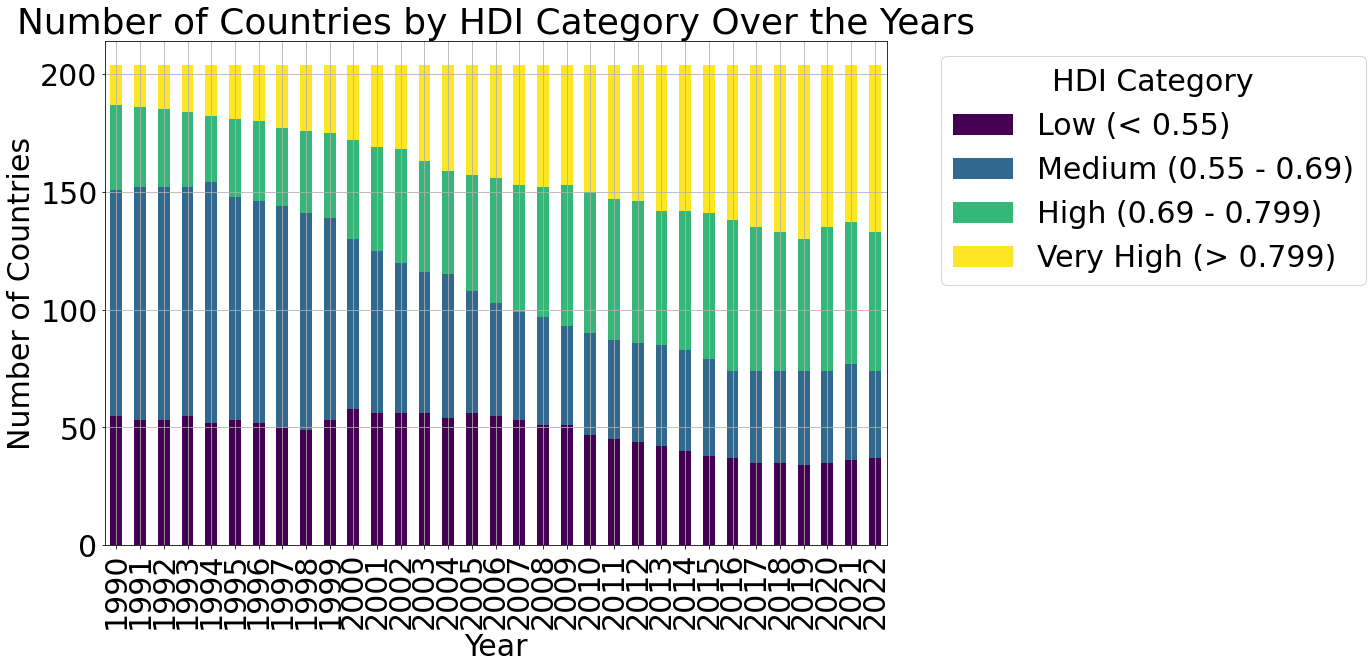

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns provided earlier
# Example dataframe structure:
# df = pd.read_csv('your_data.csv')

# Select relevant columns from 'hdi_1990' to 'hdi_2022'
relevant_columns = ['country', 'hdi_1990', 'hdi_1991', 'hdi_1992', 'hdi_1993', 'hdi_1994',
                    'hdi_1995', 'hdi_1996', 'hdi_1997', 'hdi_1998', 'hdi_1999',
                    'hdi_2000', 'hdi_2001', 'hdi_2002', 'hdi_2003', 'hdi_2004',
                    'hdi_2005', 'hdi_2006', 'hdi_2007', 'hdi_2008', 'hdi_2009',
                    'hdi_2010', 'hdi_2011', 'hdi_2012', 'hdi_2013', 'hdi_2014',
                    'hdi_2015', 'hdi_2016', 'hdi_2017', 'hdi_2018', 'hdi_2019',
                    'hdi_2020', 'hdi_2021', 'hdi_2022']

# Select the relevant columns from the DataFrame
df_hdiyn = df[relevant_columns].copy()

# Melt the DataFrame to long format for easier plotting
df_melted = df_hdiyn.melt(id_vars=['country'], var_name='year', value_name='hdi')

# Extract year from the column name
df_melted['year'] = df_melted['year'].str.extract('(\d+)').astype(int)

# Define bins and labels for HDI categories
bins = [0.0, 0.55, 0.69, 0.799, 1.0]
labels = ['Low (< 0.55)', 'Medium (0.55 - 0.69)', 'High (0.69 - 0.799)', 'Very High (> 0.799)']

# Bin the HDI values
df_melted['category'] = pd.cut(df_melted['hdi'], bins=bins, labels=labels, include_lowest=True)

# Group by year and category
df_grouped = df_melted.groupby(['year', 'category'], observed=True).size().unstack(fill_value=0)

# Plot the data
df_grouped.plot(kind='bar', stacked=True, figsize=(20, 10), colormap='viridis')

plt.title('Number of Countries by HDI Category Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(title='HDI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [110]:

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Define the list of years
available_years = ['1990', '2000', '2015', '2019', '2020', '2021', '2022']

# Select relevant columns
df_hdiyn = df[['Country'] + available_years]

# Melt the DataFrame to long format for easier plotting
df_melted = df_hdiyn.melt(id_vars=['Country'], var_name='year', value_name='hdi')
df_melted
# Convert year to numeric by extracting the year part from the 'hdi_' prefix
df_melted['year'] = df_melted['year'].str.extract('(\d+)').astype(int)

# Define bins and labels for HDI categories
bins = [0.0, 0.55, 0.69, 0.799, 1.0]
labels = ['Low (< 0.55)', 'Medium (0.55 - 0.69)', 'High (0.69 - 0.799)', 'Very High (> 0.799)']

# Bin the HDI values
df_melted['category'] = pd.cut(df_melted['hdi'], bins=bins, labels=labels, include_lowest=True)
print(df_melted[df_melted['year'] == 2020]['hdi'].unique())
# Group by category
df_grouped = df_melted.groupby(['year', 'category'], observed=True).size().unstack(fill_value=0)

# Plot the data
df_grouped.plot(kind='bar', stacked=True, figsize=(30, 15), colormap='viridis')

plt.rc('font', size=30) 
plt.title('Number of Countries by HDI Category Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(title='HDI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: "None of [Index(['Country', '1990', '2000', '2015', '2019', '2020', '2021', '2022'], dtype='object')] are in the [columns]"

In [64]:
df_cle


,country,year,hdi,category
0,Afghanistan,1990,0.284,Low (< 0.55)
1,Albania,1990,0.649,Medium (0.55 - 0.69)
2,Algeria,1990,0.593,Medium (0.55 - 0.69)
3,Andorra,1990,NaN,NaN
4,Angola,1990,NaN,NaN
...,...,...,...,...
2239,Europe and Central Asia,2022,0.802,Very High (> 0.799)
2240,Latin America and the Caribbean,2022,0.763,High (0.69 - 0.799)
2241,South Asia,2022,0.641,Medium (0.55 - 0.69)
2242,Sub-Saharan Africa,2022,0.549,Low (< 0.55)


In [54]:
available_years = ['1990', '2000', '2010', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
df_hdiyn = df_cleaned[['Country'] + available_years]

# Melt the DataFrame to long format for easier plotting
df_melted = df_hdiyn.melt(id_vars=['Country'], var_name='year', value_name='hdi')
df_melted
# Convert year to numeric
# df_melted['year'] = df_melted['year'].astype(int)


KeyError: "None of [Index(['Country', '1990', '2000', '2010', '2015', '2016', '2017', '2018',\n       '2019', '2020', '2021', '2022'],\n      dtype='object')] are in the [columns]"

In [24]:
# Define bins and labels for HDI categories
bins = [0, 0.55, 0.70, 1.0]
labels = ['Low', 'Medium', 'High']

# Bin the HDI values
df_melted['category'] = pd.cut(df_melted['hdi'], bins=bins, labels=labels, include_lowest=True)


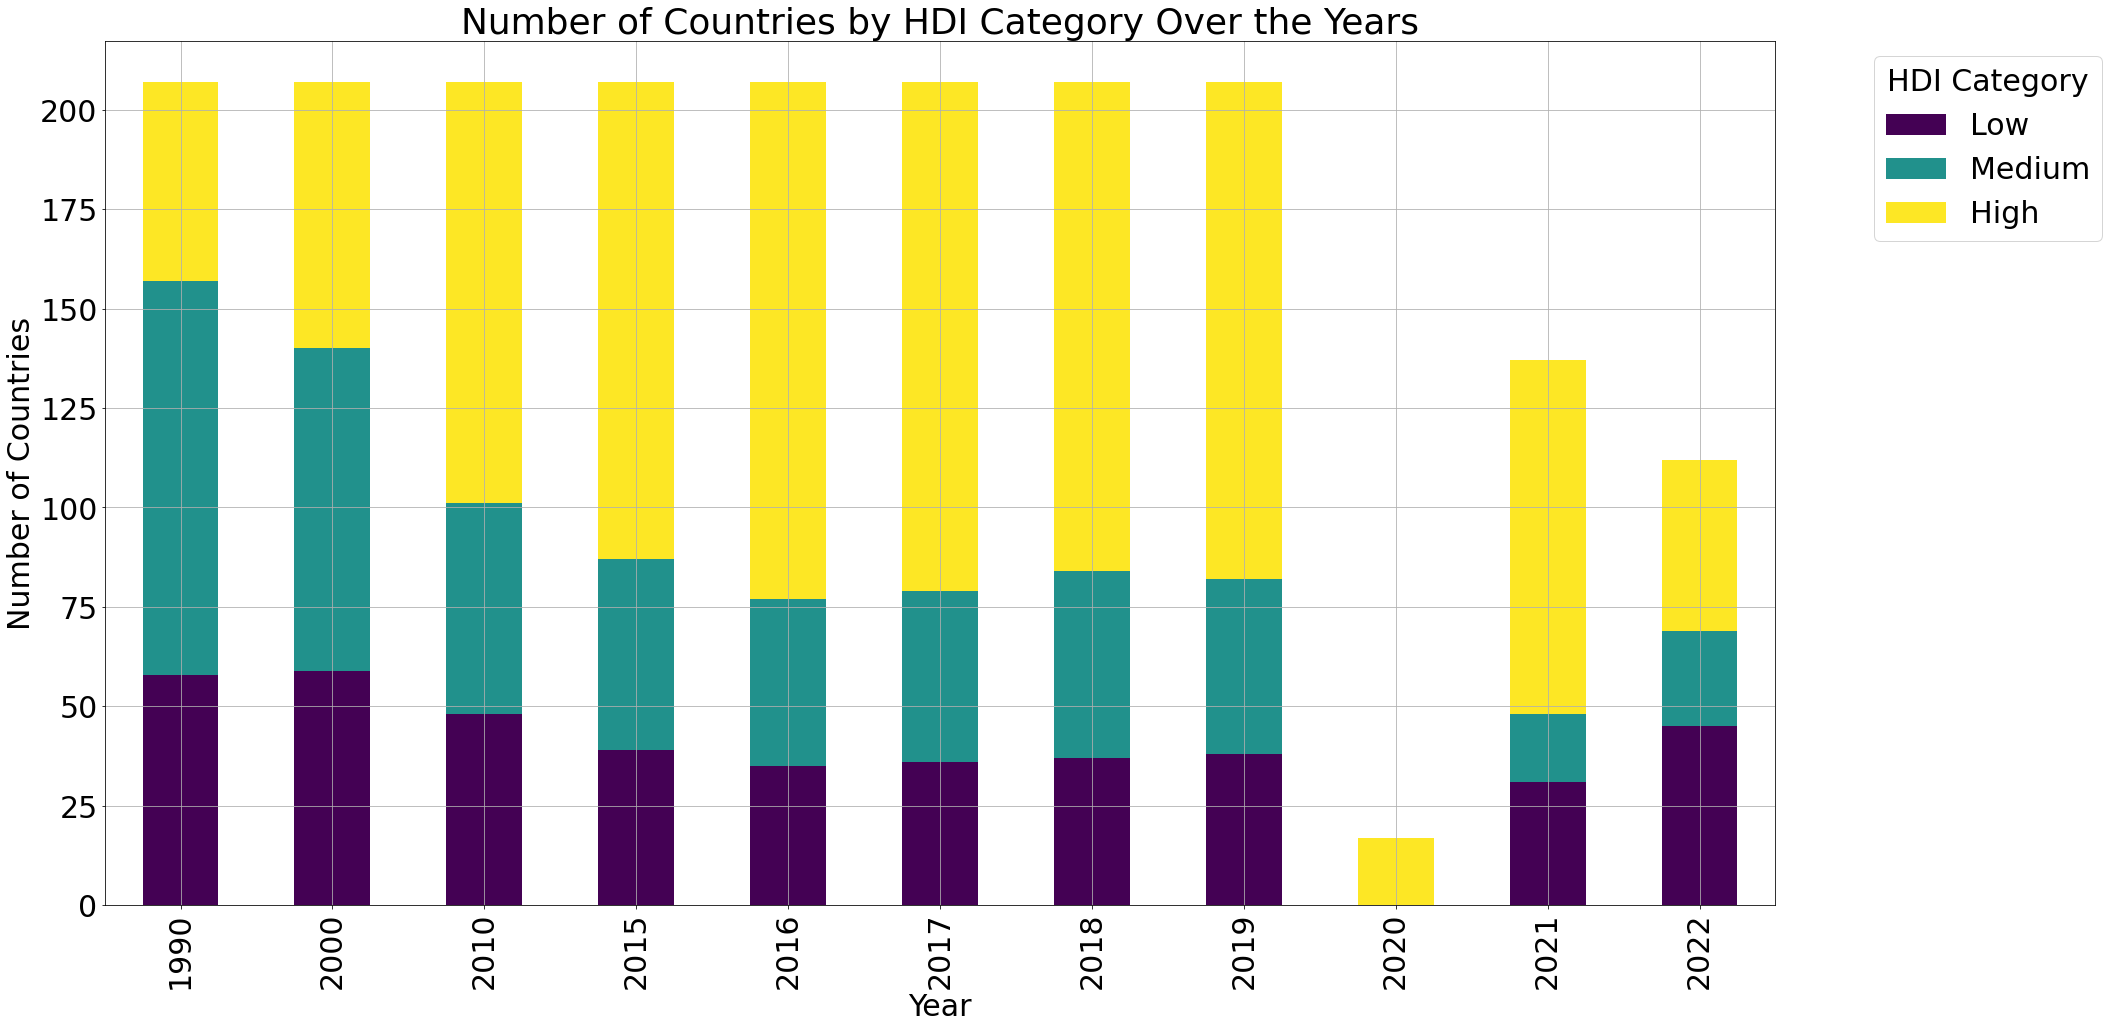

In [25]:
# Group by category
df_grouped = df_melted.groupby(['year', 'category'], observed=True).size().unstack(fill_value=0)

# Plot the data
df_grouped.plot(kind='bar', stacked=True, figsize=(30, 15), colormap='viridis')

plt.rc('font', size=30) 
plt.title('Number of Countries by HDI Category Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(title='HDI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


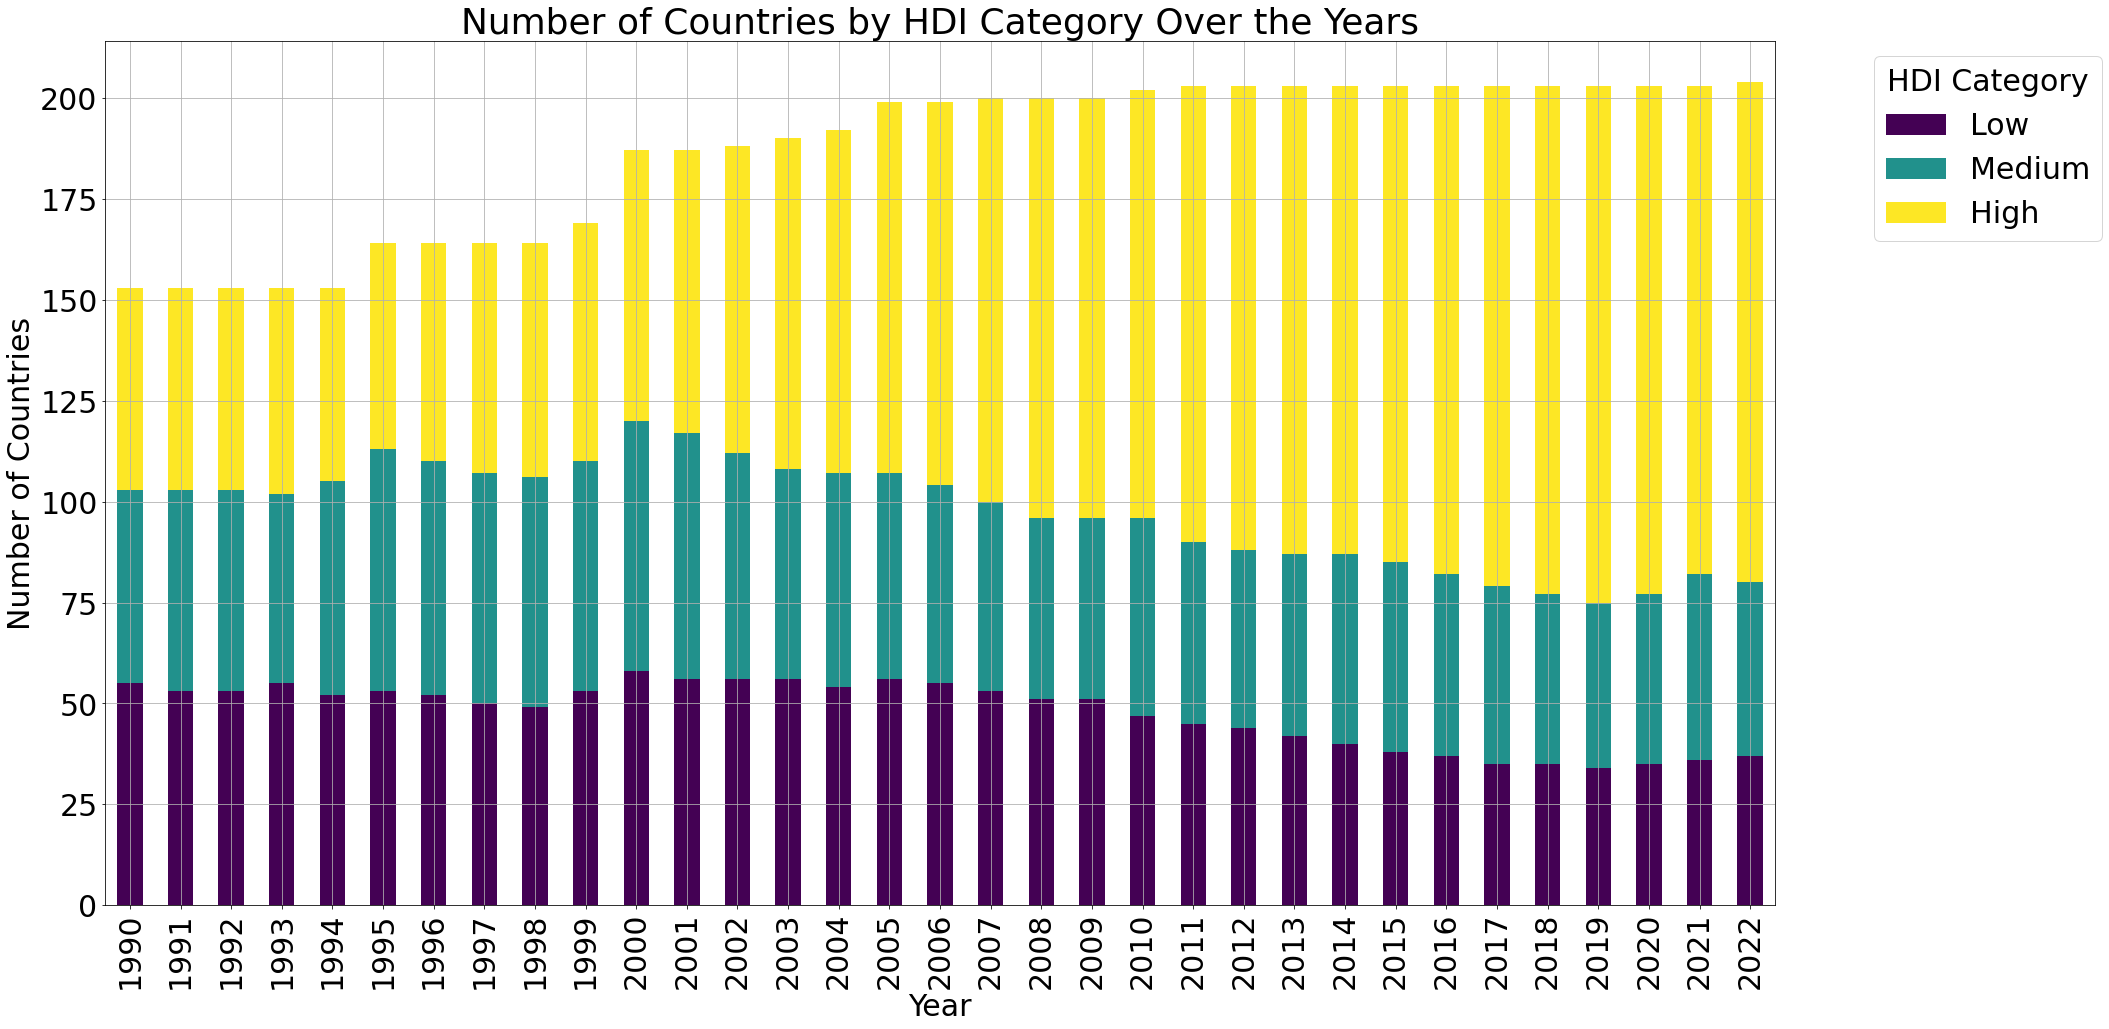

In [44]:
import matplotlib.pyplot as plt

years = list(range(1990, 2023))
hdi_columns = [f'hdi_{year}' for year in years]
df_hdiyn = df_cleaned[['country'] + hdi_columns]

# Melt the DataFrame to long format for easier plotting
df_melted = df_hdiyn.melt(id_vars=['country'], var_name='year', value_name='hdi')

# Convert year to numeric
df_melted['year'] = df_melted['year'].str.extract('(\d+)').astype(int)

# Define bins and labels for HDI categories
bins = [0, 0.55, 0.70, 1.0]
labels = ['Low', 'Medium', 'High']

# Bin the HDI values
df_melted['category'] = pd.cut(df_melted['hdi'], bins=bins, labels=labels, include_lowest=True)

#group by category
df_grouped = df_melted.groupby(['year', 'category'], observed=True).size().unstack(fill_value=0)

df_grouped.plot(kind='bar', stacked=True, figsize=(30, 15), colormap='viridis')

plt.rc('font', size=30) 
plt.title('Number of Countries by HDI Category Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(title='HDI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
df_cleaned['hdi_1990']

0      0.284
1      0.649
2      0.593
3        NaN
4        NaN
       ...  
199    0.663
200    0.637
201    0.444
202    0.404
203    0.601
Name: hdi_1990, Length: 204, dtype: float64